In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [33]:
# Fetch Bitcoin data from Yahoo Finance
#bitcoin_data = yf.download('BTC-USD', start='2023-01-01', end='2024-01-01')
bitcoin_data = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [34]:
# Calculate daily returns
bitcoin_data['Returns'] = bitcoin_data['Close'].pct_change()
bitcoin_data['Log'] = np.log(bitcoin_data['Close'])

In [35]:
# Add a column for the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
bitcoin_data['Day_of_Week'] = bitcoin_data.index.dayofweek

# Group by day of the week and calculate average returns
average_returns_by_day = bitcoin_data.groupby('Day_of_Week')['Returns'].mean()

In [36]:
# Create a dictionary to store separate DataFrames
label_dfs = {}
for label in bitcoin_data['Day_of_Week'].unique():
    label_dfs[f'df{label}'] = bitcoin_data[bitcoin_data['Day_of_Week'] == label]

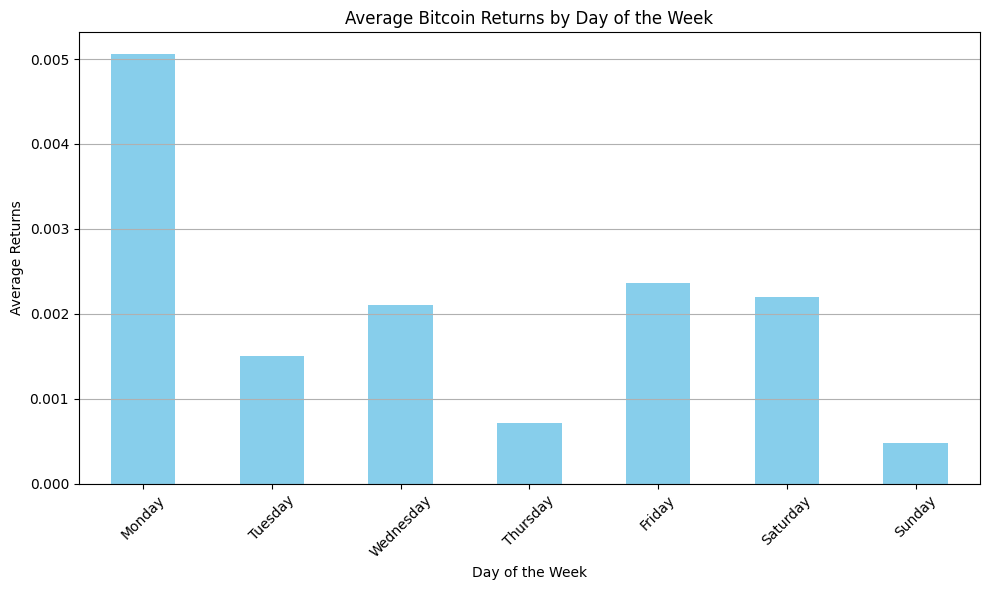

In [37]:
# Create a plot
plt.figure(figsize=(10, 6))
average_returns_by_day.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Bitcoin Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Returns')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

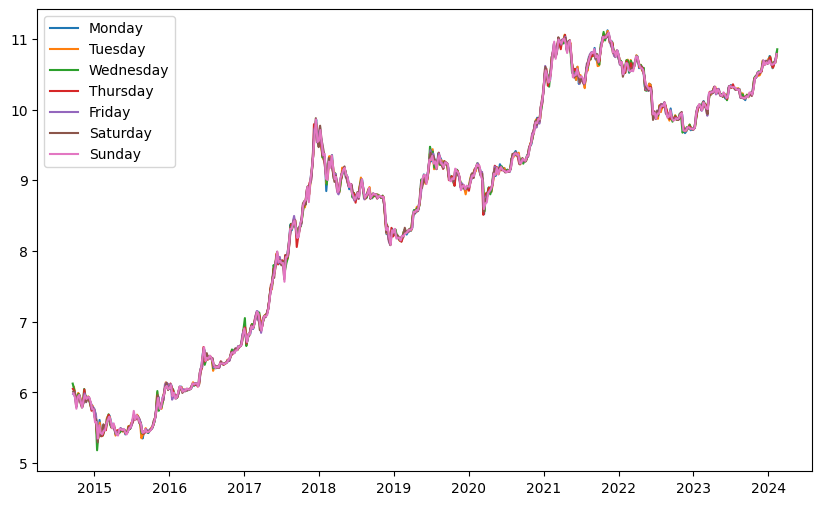

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(label_dfs["df0"]["Log"], label='Monday')
plt.plot(label_dfs["df1"]["Log"], label='Tuesday')
plt.plot(label_dfs["df2"]["Log"], label='Wednesday')
plt.plot(label_dfs["df3"]["Log"], label='Thursday')
plt.plot(label_dfs["df4"]["Log"], label='Friday')
plt.plot(label_dfs["df5"]["Log"], label='Saturday')
plt.plot(label_dfs["df6"]["Log"], label='Sunday')
#plt.title("Simple Plot")
plt.legend()
plt.show()